# <font color="blue">  Weiyi Chen

# MTH9879 Homework 7

Assigned: March 31, 2015.
Due: April 14, 2015 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Yu Gan (yugan323@gmail.com), Fubo Shi (fubo.shi.baruch@gmail.com), and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your TAs Yu Gan and/or Fubo Shi.


### 0. (0 points) 
Read Sections 4, 5 and 6 of Bouchaud, Farmer and Lillo.

## Long memory

### 1. (6 points)

Consider the long memory process

$$
X_T=\sum_{i=1}^T\,\epsilon_i
$$

with autocovariance function $\gamma(\tau)=\E[\epsilon_i\,\epsilon_{i-\tau}] \sim \tau^{-\alpha}$.  Show that as $\tau \to \infty$,

$$
\Var[X_{t+\tau}-X_t] \sim \tau ^{2\,H}
$$

where the Hurst exponent $H$ is given by

$$
H=1-\frac{\alpha}{2}.
$$

### <font color="blue"> Answer:

<font color="blue">
Given the long memory process, the delta is 

\begin{equation}
X_{t+\tau}-X_t = \sum_{i= t + 1}^{t + \tau}\epsilon_i
\end{equation}

Therefore the variance of delta is

\begin{equation}
\Var\left[X_{t+\tau}-X_t\right] = \Var\left[\sum_{i= t + 1}^ {t + \tau} \epsilon_i\right] = \sum_{i= 1}^ {\tau}\sum_{j= 1}^ {\tau}\E\left[\epsilon_i\epsilon_j\right]
\end{equation}

As $\tau \to \infty$, every item goes to $\tau^{-\alpha}$ since given $\E[\epsilon_i\,\epsilon_{i-\tau}] \sim \tau^{-\alpha}$,

\begin{equation}
\Var\left[X_{t+\tau}-X_t\right] = \sum_{i= 1}^ {\tau}\sum_{j= 1}^ {\tau}\E\left[\epsilon_i\epsilon_j\right] \sim \tau^{2-\alpha} = \tau ^{2\,H}
\end{equation}

## MSFT data from Alejandro Ca&ntilde;ete

### Set up R environment

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(highfrequency)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

trying URL 'http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip'
Content type 'application/zip' length 71919 bytes (70 KB)
opened URL
downloaded 70 KB



### 2. (6 points)

(a) Generate the series *tradeSign* of trade signs from the *msft130311.inet* data frame.

(b) Fit an AR(1) model to the *tradeSign*  data to give the forecast:
    $$
    \hat \epsilon^{(1)}_t=\phi_1\,\epsilon_{t-1}
    $$

(c) How does $\phi_1$ relate to the autocorrelation coefficients of *tradeSign*?  What is the mean-squared error of this AR(1) forecast?

(d) Fit an $AR(p)$ model to the *tradeSign* data, allowing R to find the best value of $p$ using the default AIC criterion.  This generates the forecast:
    $$
    \hat \epsilon^{(2)}_t=\sum_{k=1}^p\,\phi_k\,\epsilon_{t-k}.
    $$

(e) What value of $p$ is selected by R?  What is the mean-squared error of this AR(p) forecast?


In [4]:
%%R
# (a) Generate the series tradeSign of trade signs from the msft130311.inet data frame.
tradeSign = sign(msft130311.inet$signed.shares)

In [5]:
%%R
# (b) Fit an AR(1) model to the tradeSign data to give the forecast:
ar(tradeSign, order.max = 1)


Call:
ar(x = tradeSign, order.max = 1)

Coefficients:
    1  
0.821  

Order selected 1  sigma^2 estimated as  0.3236



Autocorrelations of series ‘tradeSign’, by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.821 0.712 0.643 0.591 0.552 0.518 0.491 0.474 0.455 0.434 0.419 0.403 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
0.395 0.387 0.375 0.364 0.352 0.340 0.331 0.324 0.310 0.300 0.293 0.285 0.279 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
0.275 0.270 0.265 0.257 0.250 0.246 0.241 0.230 0.217 0.207 0.202 0.200 0.199 
   39    40    41    42 
0.193 0.189 0.180 0.175 


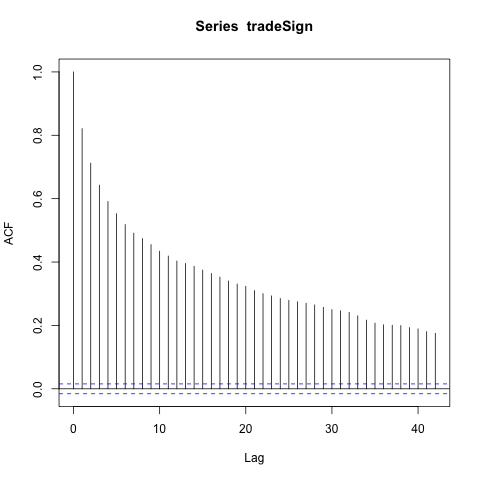

In [6]:
%%R
# (c) How does ϕ1 relate to the autocorrelation coefficients of tradeSign? 
#     What is the mean-squared error of this AR(1) forecast?
acf(tradeSign)
acf(tradeSign,plot=F)

<font color="blue"> $\phi_1$ equals to the first order autocorrelation coefficient of *tradeSign* and the mean-squared error is 0.3236.

In [7]:
%%R
ar(tradeSign)


Call:
ar(x = tradeSign)

Coefficients:
      1        2        3        4        5        6        7        8  
 0.6962   0.0375   0.0422   0.0186   0.0236   0.0048   0.0002   0.0302  
      9       10       11       12       13       14  
 0.0112  -0.0080   0.0154  -0.0127   0.0237   0.0199  

Order selected 14  sigma^2 estimated as  0.3116


<font color="blue"> p is selected as 14 and the mean-square error is 0.3116.

### 3. (8 points)

(a) Bin the AR(p) forecast data from the previous problem by forecast sign with bin-breaks from -1.01 to 1.01 in steps of 0.02.

(b) Plot the average actual order sign in each bin against the average forecast order sign.  What is the slope of the resulting graph? (Hint: use the R function *lm*).

(c) If the expected order sign is $\hat \epsilon$, what is the probability $p$ that the next trade will be a market buy?

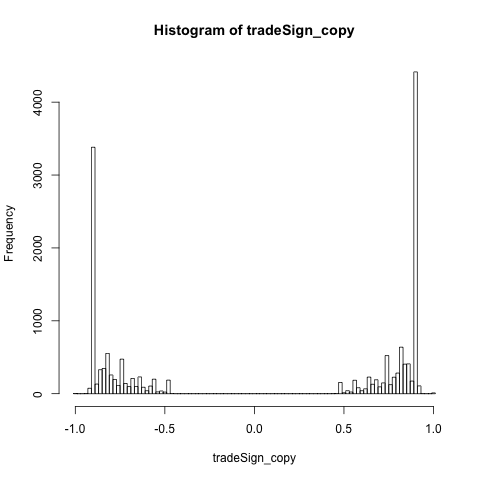

In [26]:
%%R

# (a) Bin the AR(p) forecast data from -1.01 to 1.01 in steps of 0.02.

num_order = 14
ar_forecast = ar(tradeSign)

tradeSign_copy = rep(0, length(tradeSign))
for (i in 1 : num_order)
    tradeSign_copy[i] = tradeSign[i]

for (i in (num_order+1) : length(tradeSign))
    for (j in 1 : num_order)
        tradeSign_copy[i] = tradeSign_copy[i] + tradeSign[i-j] * ar_forecast$ar[j]
hist(tradeSign_copy, breaks = seq(-1.01,1.01,by=0.02))

In [30]:
%%R

#(b) Plot the average actual order sign in each bin against the average forecast order sign.

num_bins = 101
actual   = rep(0, num_bins)
forecast = rep(0, num_bins)

for (i in 1 : num_bins){
    count = 0
    for (j in 1 : length(tradeSign))
        if (((-1.01 + 0.02 * (i-1) < tradeSign_copy[j] )) && (tradeSign_copy[j] <= (-1.01 + 0.02 * i))) {
            count       = count       + 1
            actual[i]   = actual[i]   + tradeSign[j]
            forecast[i] = forecast[i] + tradeSign_copy[j]
        }
    actual[i]   = actual[i]   / count
    forecast[i] = forecast[i] / count
}

# What is the slope of the resulting graph?

lm(actual~forecast)



Call:
lm(formula = actual ~ forecast)

Coefficients:
(Intercept)     forecast  
  -0.009251     0.983831  



<font color="blue"> (c)

The expected order sign is given, 

\begin{equation}
\hat \epsilon = 1 \times p + (-1) \times (1-p) = 2p-1
\end{equation}

So the probability p that the next trade will be a market buy is

\begin{equation}
p = \frac{\hat \epsilon + 1}{2}
\end{equation}